<a href="https://colab.research.google.com/github/yuliushenryp/Gustavo-ecommerce/blob/main/Gustavo%20ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Preparation**

## Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn import cluster 

pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.float_format',  '{:,}'.format)

In [ ]:
#import silhoutte
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

## Import Files

In [ ]:
#df_customer_og = pd.read_csv('/content/drive/MyDrive/RevoU/W6W8/customers_dataset.csv')
#df_payment_og = pd.read_csv('/content/drive/MyDrive/RevoU/W6W8/order_payments_dataset.csv')
#df_orders_og = pd.read_csv('/content/drive/MyDrive/RevoU/W6W8/orders_dataset.csv')

In [ ]:
sheet_url_out = 'https://docs.google.com/spreadsheets/d/1YlISp46nIseUeNt_gRSuOQICiWv4DANby3BcSiZ-Lv0/edit#gid=1190585044'
sheet_url_out_trf = sheet_url_out.replace('/edit#gid=', '/export?format=csv&gid=')
df_customer_og = pd.read_csv(sheet_url_out_trf)

In [ ]:
sheet_url_out = 'https://docs.google.com/spreadsheets/d/1qgkCwUEc8rHlNOFIEFZcxFsKnRAR_OIhhygMBm32-Ok/edit#gid=1185106334'
sheet_url_out_trf = sheet_url_out.replace('/edit#gid=', '/export?format=csv&gid=')
df_payment_og = pd.read_csv(sheet_url_out_trf)

In [ ]:
sheet_url_out = 'https://docs.google.com/spreadsheets/d/1RFJ_JH_DQ6BHVhycidIKY_P7KL9U_nAbTabv67IX4Hg/edit#gid=808186477'
sheet_url_out_trf = sheet_url_out.replace('/edit#gid=', '/export?format=csv&gid=')
df_orders_og = pd.read_csv(sheet_url_out_trf)

In [ ]:
#make copy to preserve the original data
df_customer = df_customer_og.copy()
df_payment = df_payment_og.copy()
df_orders = df_orders_og.copy()

#**Data Cleaning**

## Irrelevant Values

In [ ]:
#check the data first
display(df_customer.head(2))
print()
display(df_payment.head(2))
print()
display(df_orders.head(2))

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 3:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 0:00:00


Deleted columns:

df_customer = customer_unique_id,zip code

df_payment =  payment_sequential

In [ ]:
df_customer.drop(columns=['customer_unique_id','customer_zip_code_prefix'], inplace=True)
df_payment.drop(columns=['payment_sequential'], inplace=True)

## Missing Data

In [ ]:
#null values only on orders dataset
display(df_customer.isnull().sum())
print()
display(df_payment.isnull().sum())
print()
display(df_orders.isnull().sum())

customer_id       0
customer_city     0
customer_state    0
dtype: int64

order_id                0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Notes for handling missing values:
* Decided to only remove rows with missing values on column order_approved_at.
* Other columns with null values will be replaced with 0.

In [ ]:
df_orders.dropna(subset=['order_approved_at'], inplace=True)
df_orders.fillna('0', inplace=True)

## Duplicate Values

In [ ]:
#duplicates only on payments dataset
display(df_customer.duplicated().sum())
display(df_payment.duplicated().sum())
display(df_orders.duplicated().sum())

0

614

0

remove duplicates on payment dataframe

In [ ]:
df_payment.drop_duplicates(keep='first', inplace=True)

## Outliers

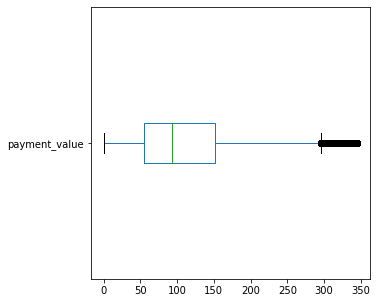

In [ ]:
df_payment.boxplot(column=['payment_value'],fontsize=10,rot=0,grid=False,figsize=(5,5),vert=False)

In [ ]:
Q1 = df_payment['payment_value'].quantile(0.25)
Q3 = df_payment['payment_value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = df_payment['payment_value'].min()
upper_bound = Q3 + 1.5 * IQR
print('Q1:',Q1)
print('\nQ3:',Q3)
print('\nIQR:',IQR)
print('\nLower Bound:',lower_bound)
print('\nUpper Bound:',upper_bound)

Q1: 57.49

Q3: 172.465

IQR: 114.975

Lower Bound: 0.0

Upper Bound: 344.9275


In [ ]:
#count how many the outliers are
num_of_outlier = len(df_payment[df_payment['payment_value'] > upper_bound]['payment_value'])
num_of_non_outlier = len(df_payment[df_payment['payment_value'] <= upper_bound]['payment_value'])
total_data = len(df_payment)

print('Number of outlier =', num_of_outlier)
print('\nNumber of non outlier =', num_of_non_outlier)
print('\nTotal data =', total_data)

Number of outlier = 7959

Number of non outlier = 95313

Total data = 103272


In [ ]:
df_payment = df_payment[df_payment['payment_value'] <= upper_bound]

## Data Convert

In [ ]:
display(df_customer.info())
print()
display(df_payment.info())
print()
display(df_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     99441 non-null  object
 1   customer_city   99441 non-null  object
 2   customer_state  99441 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


None


<class 'pandas.core.frame.DataFrame'>
Int64Index: 95313 entries, 0 to 103885
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              95313 non-null  object 
 1   payment_type          95313 non-null  object 
 2   payment_installments  95313 non-null  int64  
 3   payment_value         95313 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.6+ MB


None


<class 'pandas.core.frame.DataFrame'>
Int64Index: 99281 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99281 non-null  object
 1   customer_id                    99281 non-null  object
 2   order_status                   99281 non-null  object
 3   order_purchase_timestamp       99281 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   99281 non-null  object
 6   order_delivered_customer_date  99281 non-null  object
 7   order_estimated_delivery_date  99281 non-null  object
dtypes: object(8)
memory usage: 6.8+ MB


None

In [ ]:
#need to convert order time (purchase, approve, delivery) from object to datetime
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['order_approved_at'] = pd.to_datetime(df_orders['order_approved_at'])
df_orders['order_delivered_carrier_date'] = pd.to_datetime(df_orders['order_delivered_carrier_date'], errors='coerce')
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'], errors='coerce')
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'])
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99281 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99281 non-null  object        
 1   customer_id                    99281 non-null  object        
 2   order_status                   99281 non-null  object        
 3   order_purchase_timestamp       99281 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97644 non-null  datetime64[ns]
 6   order_delivered_customer_date  96462 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99281 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.8+ MB


## Merge Dataset

In [ ]:
df_merge = pd.merge(pd.merge(df_orders,df_customer,on='customer_id'),df_payment,on='order_id')
df_merge.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_city,customer_state,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,sao paulo,SP,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,sao paulo,SP,voucher,1,2.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,sao paulo,SP,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,barreiras,BA,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,vianopolis,GO,credit_card,3,179.12


In [ ]:
df_merge[df_merge['customer_state']=='RJ']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_city,customer_state,payment_type,payment_installments,payment_value
9,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,nilopolis,RJ,credit_card,3,75.16
13,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07,rio de janeiro,RJ,credit_card,1,259.06
29,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12,rio de janeiro,RJ,boleto,1,125.43
37,d887b52c6516beb39e8cd44a5f8b60f7,d9ef95f98d8da3b492bb8c0447910498,delivered,2018-02-03 12:38:58,2018-02-03 12:50:30,2018-02-05 21:26:53,2018-02-22 00:07:55,2018-03-07,mesquita,RJ,credit_card,1,100.25
43,1e7aff52cdbb2451ace09d0f848c3699,ddaff536587109b89777e0353215e150,delivered,2017-05-19 18:53:40,2017-05-19 19:05:17,2017-05-22 10:16:07,2017-05-31 13:58:46,2017-06-12,paracambi,RJ,credit_card,4,154.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95095,91e29e944ec4772168d915912b251455,26c46b7d7e555c6ab71b788185ed8088,delivered,2018-02-24 19:43:39,2018-02-24 19:55:43,2018-02-27 12:36:45,2018-03-15 22:32:57,2018-03-21,valenca,RJ,credit_card,1,77.22
95105,53ca14c357e60c77cd57aa96c8f0b4a5,f1cf46100438d0ef4e1916f2aef26718,delivered,2018-04-12 19:57:59,2018-04-14 12:11:11,2018-04-16 19:11:24,2018-05-02 19:58:28,2018-05-21,rio de janeiro,RJ,credit_card,3,164.61
95106,cd076ae3646af3e93e3deb91b8454c6e,04c29bffd4d52318bc9315f4507336fa,delivered,2017-12-15 19:14:22,2017-12-15 19:31:13,2017-12-18 18:37:12,2017-12-29 17:59:15,2018-01-10,rio de janeiro,RJ,credit_card,1,104.56
95123,33baefa752f2d98a008d4330d306d3db,8b764335e86e1a8f8d3db9f119e03a79,delivered,2017-04-23 14:47:39,2017-04-25 08:11:27,2017-04-25 13:24:03,2017-05-05 13:26:31,2017-05-15,rio de janeiro,RJ,boleto,1,73.17


In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95169 entries, 0 to 95168
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       95169 non-null  object        
 1   customer_id                    95169 non-null  object        
 2   order_status                   95169 non-null  object        
 3   order_purchase_timestamp       95169 non-null  datetime64[ns]
 4   order_approved_at              95169 non-null  datetime64[ns]
 5   order_delivered_carrier_date   93691 non-null  datetime64[ns]
 6   order_delivered_customer_date  92548 non-null  datetime64[ns]
 7   order_estimated_delivery_date  95169 non-null  datetime64[ns]
 8   customer_city                  95169 non-null  object        
 9   customer_state                 95169 non-null  object        
 10  payment_type                   95169 non-null  object        
 11  payment_install

#**EDA**

In [ ]:
df_eda = df_merge.copy()

In [ ]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95169 entries, 0 to 95168
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       95169 non-null  object        
 1   customer_id                    95169 non-null  object        
 2   order_status                   95169 non-null  object        
 3   order_purchase_timestamp       95169 non-null  datetime64[ns]
 4   order_approved_at              95169 non-null  datetime64[ns]
 5   order_delivered_carrier_date   93691 non-null  datetime64[ns]
 6   order_delivered_customer_date  92548 non-null  datetime64[ns]
 7   order_estimated_delivery_date  95169 non-null  datetime64[ns]
 8   customer_city                  95169 non-null  object        
 9   customer_state                 95169 non-null  object        
 10  payment_type                   95169 non-null  object        
 11  payment_install

##Further cleaning before analysis

- Decided to delete customer with payment value=0 (only 5 customers).
- Filter the order status to only delivered, because other order status still have probability of being canceled or failed delivery. (Other status is also only 2,75% of the data).
- delete the order_status column.

In [ ]:
df_eda[df_eda['payment_value']==0]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_city,customer_state,payment_type,payment_installments,payment_value
411,45ed6e85398a87c253db47c2d9f48216,8eab8f9b3c744b76b65f7a2c0c8f2d6c,delivered,2017-06-08 21:18:45,2017-06-08 21:30:18,2017-06-09 08:35:18,2017-06-22 17:44:53,2017-07-10,goiania,GO,voucher,1,0.0
24827,fa65dad1b0e818e3ccc5cb0e39231352,9af2372a1e49340278e7c1ef8d749f34,shipped,2017-04-20 12:45:34,2017-04-22 09:10:13,2017-04-24 11:31:17,NaT,2017-05-18,cuiaba,MT,voucher,1,0.0
30947,6ccb433e00daae1283ccc956189c82ae,843b211abe7b0264dd4a69eafc5bdf43,delivered,2017-10-26 23:51:35,2017-10-27 00:46:58,2017-10-27 19:53:03,2017-11-08 18:47:00,2017-11-22,petropolis,RJ,voucher,1,0.0
82125,b23878b3e8eb4d25a158f57d96331b18,648121b599d98c420ef93f6135f8c80c,delivered,2017-05-27 19:20:24,2017-05-27 19:35:17,2017-05-29 04:49:37,2017-06-07 08:53:10,2017-06-29,anchieta,ES,voucher,1,0.0
92815,8bcbe01d44d147f901cd3192671144db,f2def7f64f36952f2f5a9791f0285f34,delivered,2018-01-24 23:24:14,2018-01-24 23:37:20,2018-01-30 22:43:30,2018-02-02 21:26:42,2018-02-21,rio de janeiro,RJ,voucher,1,0.0


In [ ]:
df_eda = df_eda[df_eda['payment_value'] != 0]

In [ ]:
df_eda.drop(['order_status'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


##Descriptive Statistics

In [ ]:
desc_column = ['customer_city','customer_state','payment_type']
num_column = ['payment_installments','payment_value']

In [ ]:
df_eda[desc_column].describe()

,customer_city,customer_state,payment_type
count,95164,95164,95164
unique,4000,27,4
top,sao paulo,SP,credit_card
freq,15071,40542,70227


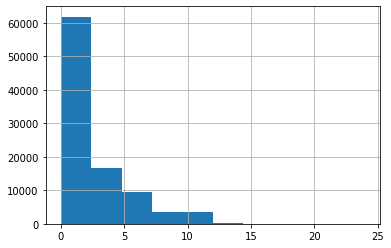

In [ ]:
df_eda['payment_installments'].hist()

In [ ]:
def desc_stats(df):
  stats = df_eda.describe()
  stats.loc['IQR'] = stats.loc['75%'] - stats.loc['25%']
  stats.loc['Range'] = stats.loc['max'] - stats.loc['min']
  stats.loc['skewness'] =  stats.skew()

  return round(stats,2)

In [ ]:
desc_stats(df_eda[desc_column])

,payment_installments,payment_value
count,"95,164.0","95,164.0"
mean,2.64,110.64
std,2.46,72.72
min,0.0,0.01
25%,1.0,54.49
50%,1.0,92.77
75%,3.0,151.18
max,24.0,344.89
IQR,2.0,96.69
Range,24.0,344.88


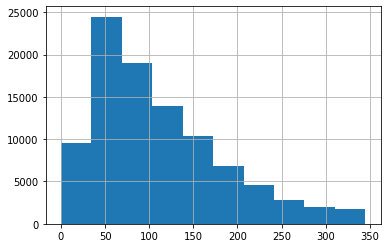

In [ ]:
df_eda['payment_value'].hist()

**Insights**

- We have customers spread across 27 different states, with majority comes from Sao Paulo.
- Our customers preffered to pay with credit card, followed by payment via Boleto


- Both of our numerical data are a positively skewed data.
- Majority of our customers choose payment installment within 1-3 months.
- Average amount spent by our customer is €110.


##Number of Orders per Month

In [ ]:
monthly_order = df_eda.copy()
monthly_order['Month'] = pd.DatetimeIndex(df_eda['order_purchase_timestamp']).month
monthly_order

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_city,customer_state,payment_type,payment_installments,payment_value,Month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,sao paulo,SP,credit_card,1,18.12,10
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,sao paulo,SP,voucher,1,2.0,10
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,sao paulo,SP,voucher,1,18.59,10
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,barreiras,BA,boleto,1,141.46,7
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,vianopolis,GO,credit_card,3,179.12,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95164,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22,sao paulo,SP,credit_card,3,155.99,2
95165,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,sao jose dos campos,SP,credit_card,3,85.08,3
95166,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,praia grande,SP,credit_card,3,195.0,2
95167,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,nova vicosa,BA,credit_card,5,271.01,8


In [ ]:
monthly_order = monthly_order.groupby('Month')['order_id'].nunique().reset_index()
#manipulate the string of column name to be more suitable for visualization.
monthly_order.columns = ['Month','Num of Orders']
monthly_order.sort_values(by='Month', ascending=True, inplace=True)
monthly_order

,Month,Num of Orders
0,1,7456
1,2,7897
2,3,9086
3,4,8554
4,5,9705
5,6,8649
6,7,9504
7,8,9998
8,9,3915
9,10,4510


In [ ]:
fig = px.line(monthly_order, x='Month', y='Num of Orders', text='Num of Orders', title='Number of Orders per Month')
fig.update_traces(textposition='top left')
fig.update_xaxes(type='category')
fig.show()

**Insights**

- There is a constant increase of orders from the 1st to 8th month.
- On the 9th month there is a decrease of orders by 61%.
- The highest number of orders is at the 8th month with 9783 orders.
- The lowest number of orders is at the 9th month with only 3798 orders.

##Number of Orders per Location

In [ ]:
order_location = df_eda.groupby('customer_state')['order_id'].nunique().reset_index()
order_location.columns = ['Location','Num of Orders']
order_location.sort_values(by='Num of Orders', ascending=True, inplace=True)
order_location

,Location,Num of Orders
21,RR,37
3,AP,59
0,AC,66
2,AM,132
20,RO,214
26,TO,242
24,SE,299
1,AL,344
19,RN,428
16,PI,430


In [ ]:
fig = px.bar(order_location, x='Location', y='Num of Orders', text='Num of Orders', title='Number of Orders per Location')
fig.show()

##Daily Orders Trend

Busiest day of the week

In [ ]:
daily_trend = df_eda.copy()
daily_trend['Day'] = pd.DatetimeIndex(df_eda['order_purchase_timestamp']).dayofweek
daily_trend

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_city,customer_state,payment_type,payment_installments,payment_value,Day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,sao paulo,SP,credit_card,1,18.12,0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,sao paulo,SP,voucher,1,2.0,0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,sao paulo,SP,voucher,1,18.59,0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,barreiras,BA,boleto,1,141.46,1
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,vianopolis,GO,credit_card,3,179.12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95164,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22,sao paulo,SP,credit_card,3,155.99,3
95165,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,sao jose dos campos,SP,credit_card,3,85.08,3
95166,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,praia grande,SP,credit_card,3,195.0,1
95167,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,nova vicosa,BA,credit_card,5,271.01,6


In [ ]:
daily_trend = daily_trend.groupby('Day')['order_id'].agg('count').reset_index()
daily_trend.columns = ['Day of Week','Num of Orders']
daily_trend

,Day of Week,Num of Orders
0,0,15432
1,1,15309
2,2,14877
3,3,14148
4,4,13493
5,5,10418
6,6,11487


In [ ]:
fig = px.line(daily_trend, x='Day of Week', y='Num of Orders', text='Num of Orders', title='Daily Orders Trend')
fig.update_traces(textposition='bottom left')
fig.show()

**Insights**

- Highest number of orders is on Monday with 14.996 orders in total.
- Lowest number of orders is on Saturday with only 10.114 orders in total.
- There is a constant decrease of orders from Tuesday to Saturday.
- Highest decrrase of orders happens between Friday to Saturday with 23% of decrease.

##Percentage of Orders per Payment Type

In [ ]:
payment_analysis = df_eda.groupby('payment_type')['order_id'].nunique().reset_index()
payment_analysis.columns = ['payment_type', 'number_orders']
payment_analysis.sort_values(by='number_orders', ascending=False, inplace=True)
payment_analysis

,payment_type,number_orders
1,credit_card,69999
0,boleto,18477
3,voucher,3733
2,debit_card,1443


In [ ]:
fig = px.pie(payment_analysis, values='number_orders', names='payment_type', title='Percentage of Orders per Payment Type')
fig.show()

In [ ]:
#further analysis on payment using credit card
cc_analysis = df_eda[df_eda['payment_type']=='credit_card']
cc_analysis = cc_analysis.groupby('payment_installments')['order_id'].nunique().reset_index()

In [ ]:
cc_analysis.columns = ['payment_installments', 'number_orders']
cc_analysis.sort_values(by='number_orders', ascending=False, inplace=True)
cc_analysis

,payment_installments,number_orders
1,1,24797
2,2,12007
3,3,9926
4,4,6571
5,5,4717
10,10,3447
6,6,3359
8,8,3127
7,7,1388
9,9,537


**Insights** 

- 75% percent of our customer use credit card as payment method.
- 62% of customers that pays with credit card, completed their payment within 3x installments.
- Debit card is the least preffered method of payment.

#**Customer Segmentation**

In [ ]:
df_cluster = df_eda.copy()

##Further cleaning before clustering
- drop column with data type object & timestamp
- drop customer_city column
- convert customer_state and payment_type column to categorical for clustering
- only take top 3 location with highest order for clustering

In [ ]:
#drop column that won't be used for customer segmentation
df_cluster = df_cluster[['order_id','customer_state','payment_type','payment_installments','payment_value']]
df_cluster.head()

,order_id,customer_state,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,SP,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,SP,voucher,1,2.0
2,e481f51cbdc54678b7cc49136f2d6af7,SP,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,BA,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,GO,credit_card,3,179.12


In [ ]:
#top 3 location with highest number of orders
order_location = df_eda.groupby('customer_state')['order_id'].nunique().reset_index()
order_location.columns = ['Location','Num of Orders']
order_location.sort_values(by='Num of Orders', ascending=False, inplace=True)
order_location.head(3)

,Location,Num of Orders
25,SP,39003
18,RJ,11804
10,MG,10742


In [ ]:
location = ['SP','RJ','MG']
df_cluster = df_cluster[df_cluster.isin(location).any(axis=1)]

In [ ]:
#preparing for customer segmentation
df_segmentation = df_cluster.copy()

In [ ]:
#change the object data type to category 
df_cluster['customer_state'] = df_cluster['customer_state'].astype('category')
df_cluster['state_category'] = df_cluster['customer_state'].cat.codes

In [ ]:
dum_df = pd.get_dummies(df_cluster, columns=["payment_type"], prefix=["payment_type"])
df_cluster = df_cluster.merge(dum_df)
df_cluster.head()

,order_id,customer_state,payment_type,payment_installments,payment_value,state_category,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,e481f51cbdc54678b7cc49136f2d6af7,SP,credit_card,1,18.12,2,0,1,0,0
1,e481f51cbdc54678b7cc49136f2d6af7,SP,voucher,1,2.0,2,0,0,0,1
2,e481f51cbdc54678b7cc49136f2d6af7,SP,voucher,1,18.59,2,0,0,0,1
3,ad21c59c0840e6cb83a9ceb5573f8159,SP,credit_card,1,28.62,2,0,1,0,0
4,6514b8ad8028c9f2cc2374ded245783f,RJ,credit_card,3,75.16,1,0,1,0,0


In [ ]:
#scaling the numerical data
num_column= ['payment_installments','payment_value','state_category']

In [ ]:
scaler = MinMaxScaler()

df_cluster[num_column] = scaler.fit_transform(df_cluster[num_column])
df_cluster

,order_id,customer_state,payment_type,payment_installments,payment_value,state_category,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,e481f51cbdc54678b7cc49136f2d6af7,SP,credit_card,0.041666666666666664,0.05251101832521456,1.0,0,1,0,0
1,e481f51cbdc54678b7cc49136f2d6af7,SP,voucher,0.041666666666666664,0.00577012294131292,1.0,0,0,0,1
2,e481f51cbdc54678b7cc49136f2d6af7,SP,voucher,0.041666666666666664,0.053873811180700525,1.0,0,0,0,1
3,ad21c59c0840e6cb83a9ceb5573f8159,SP,credit_card,0.041666666666666664,0.08295639062862445,1.0,0,1,0,0
4,6514b8ad8028c9f2cc2374ded245783f,RJ,credit_card,0.125,0.217901878914405,0.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
64068,aa04ef5214580b06b10e2a378300db44,MG,voucher,0.041666666666666664,0.7248608211551844,0.0,0,0,0,1
64069,aa04ef5214580b06b10e2a378300db44,MG,credit_card,0.20833333333333331,0.4042565530039434,0.0,0,1,0,0
64070,880675dff2150932f1601e1c07eadeeb,SP,credit_card,0.125,0.4522732544653213,1.0,0,1,0,0
64071,9c5dedf39a927c1b2549525ed64a053c,SP,credit_card,0.125,0.24666550684295985,1.0,0,1,0,0


In [ ]:
#drop column with data type=object
df_cluster = df_cluster.drop(['order_id','payment_type','customer_state'],axis=1)
df_cluster.head()

,payment_installments,payment_value,state_category,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,0.041666666666666664,0.05251101832521456,1.0,0,1,0,0
1,0.041666666666666664,0.00577012294131292,1.0,0,0,0,1
2,0.041666666666666664,0.053873811180700525,1.0,0,0,0,1
3,0.041666666666666664,0.08295639062862445,1.0,0,1,0,0
4,0.125,0.217901878914405,0.5,0,1,0,0


##Determining the n-Cluster

using Elbow Method and Silhouette Analysis

**Result:**

From both method to determine n-cluster, it is decided that the best number of cluster for this analysis is 3

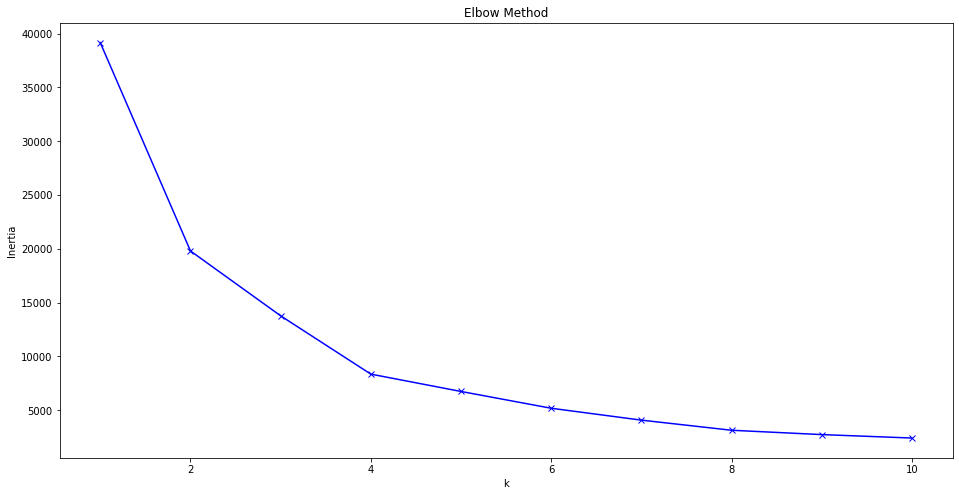

In [ ]:
#Elbow Method
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(df_cluster)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5847205056242464
For n_clusters = 3 The average silhouette_score is : 0.5219432105662685
For n_clusters = 4 The average silhouette_score is : 0.5821576301543809
For n_clusters = 5 The average silhouette_score is : 0.5805219325053818
For n_clusters = 6 The average silhouette_score is : 0.5988323779767414


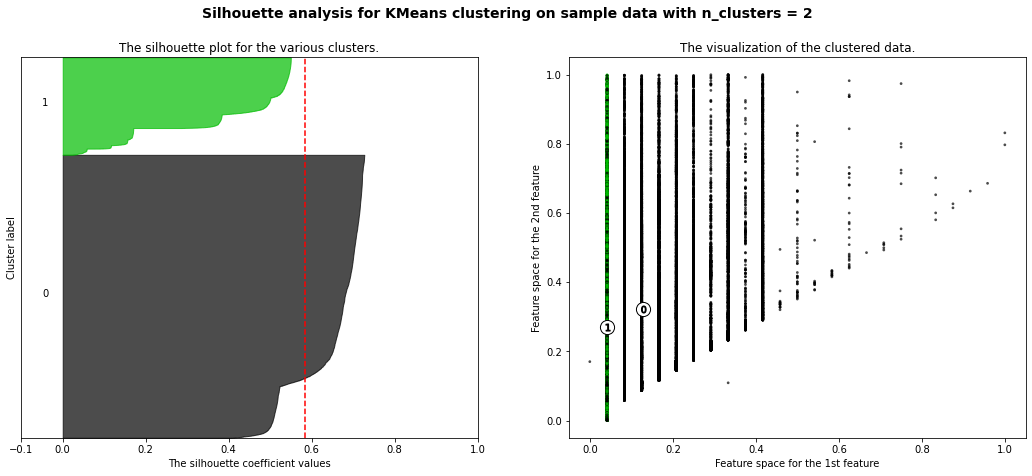

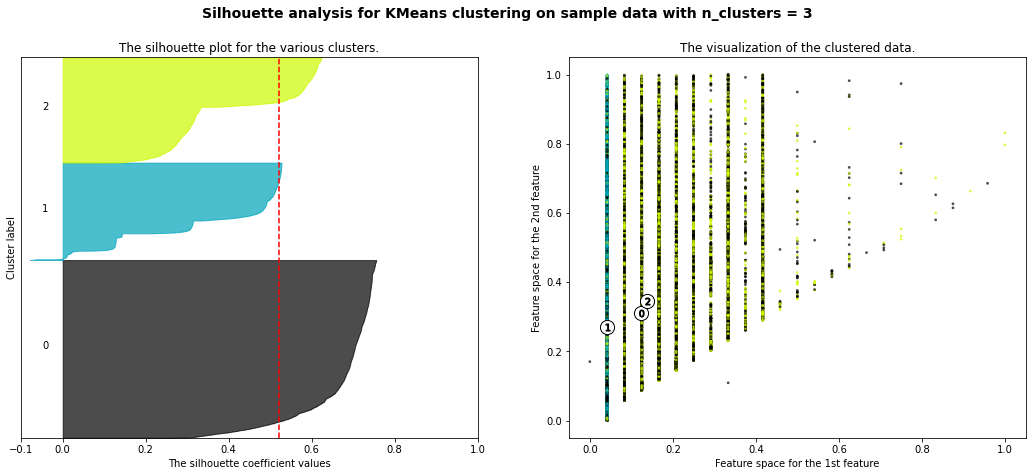

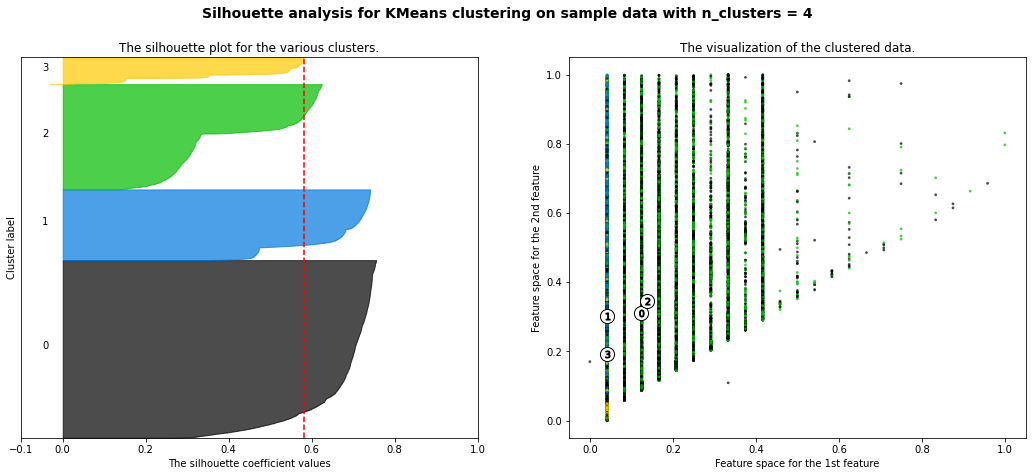

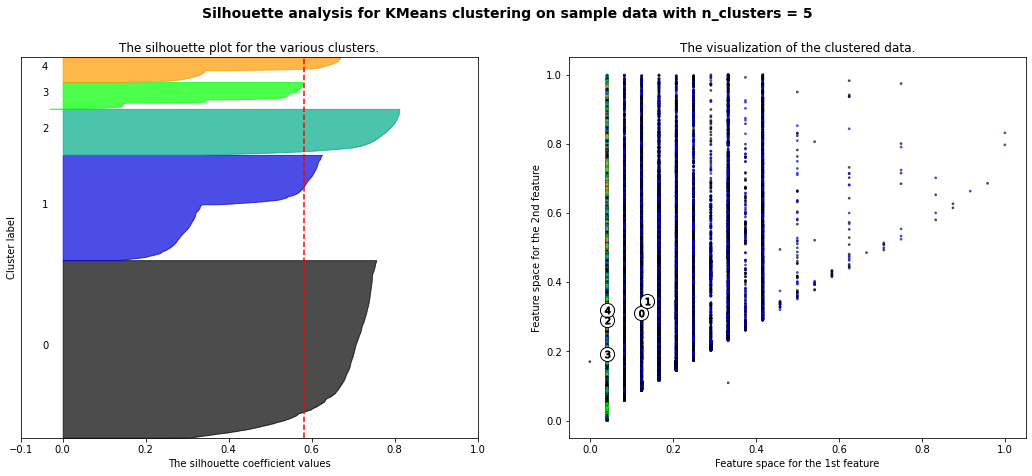

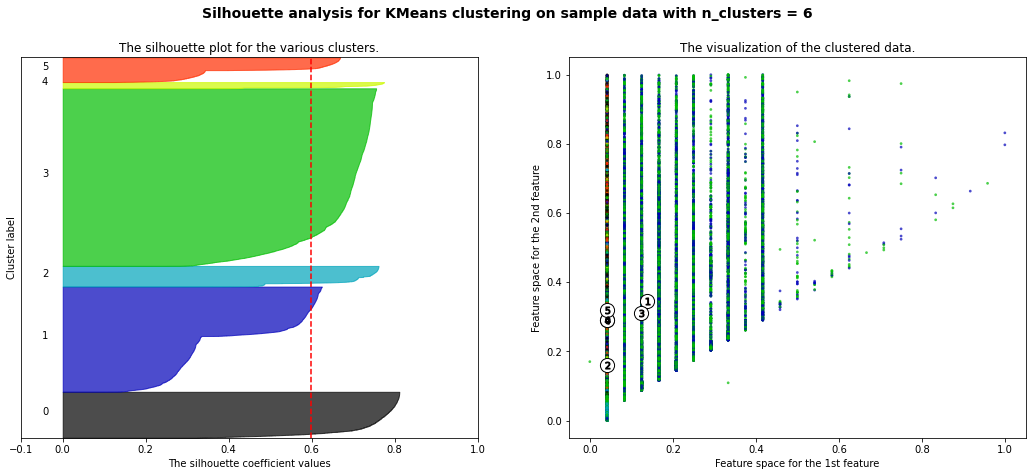

In [ ]:
#Silhouette Analysis
#In case of silhouette analysis taking too long, i've attached screenshots of the result below
silhoutte_analysis(df_cluster,list(range(2,7)))

##Silhouette Analysis Screenshots
In case of google colab taking too long to process

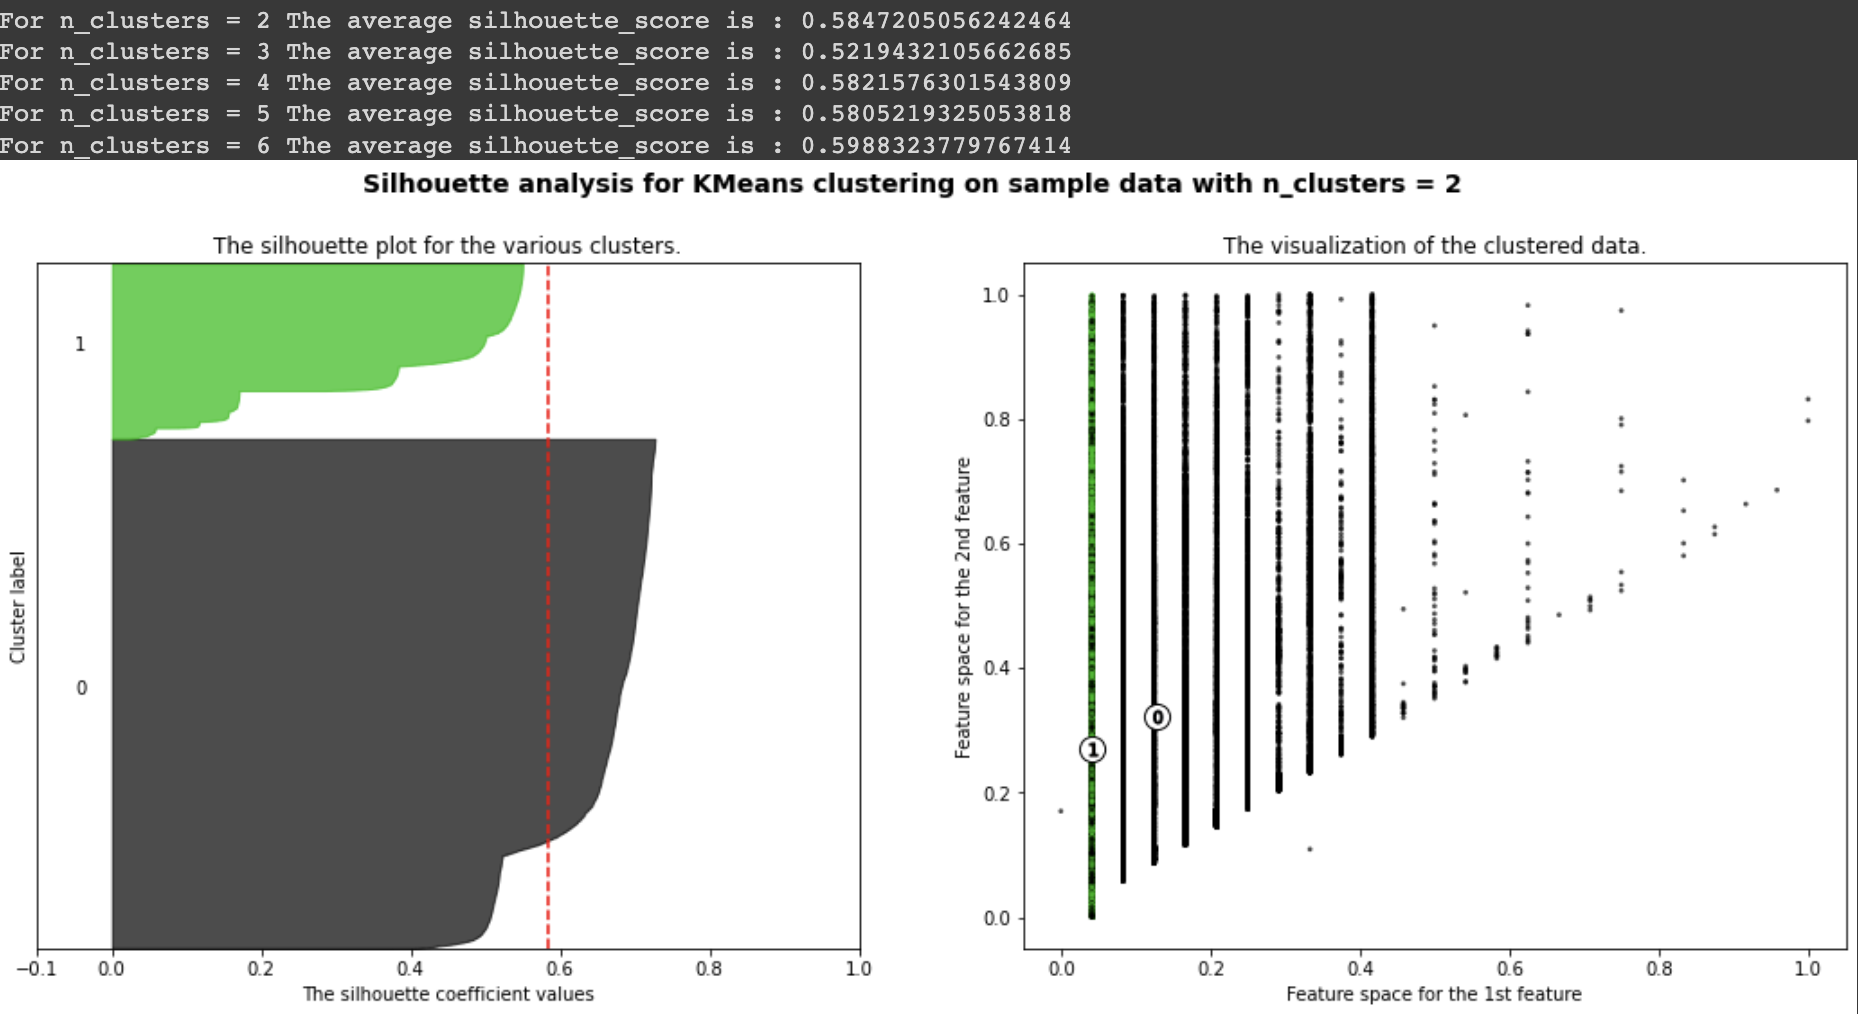

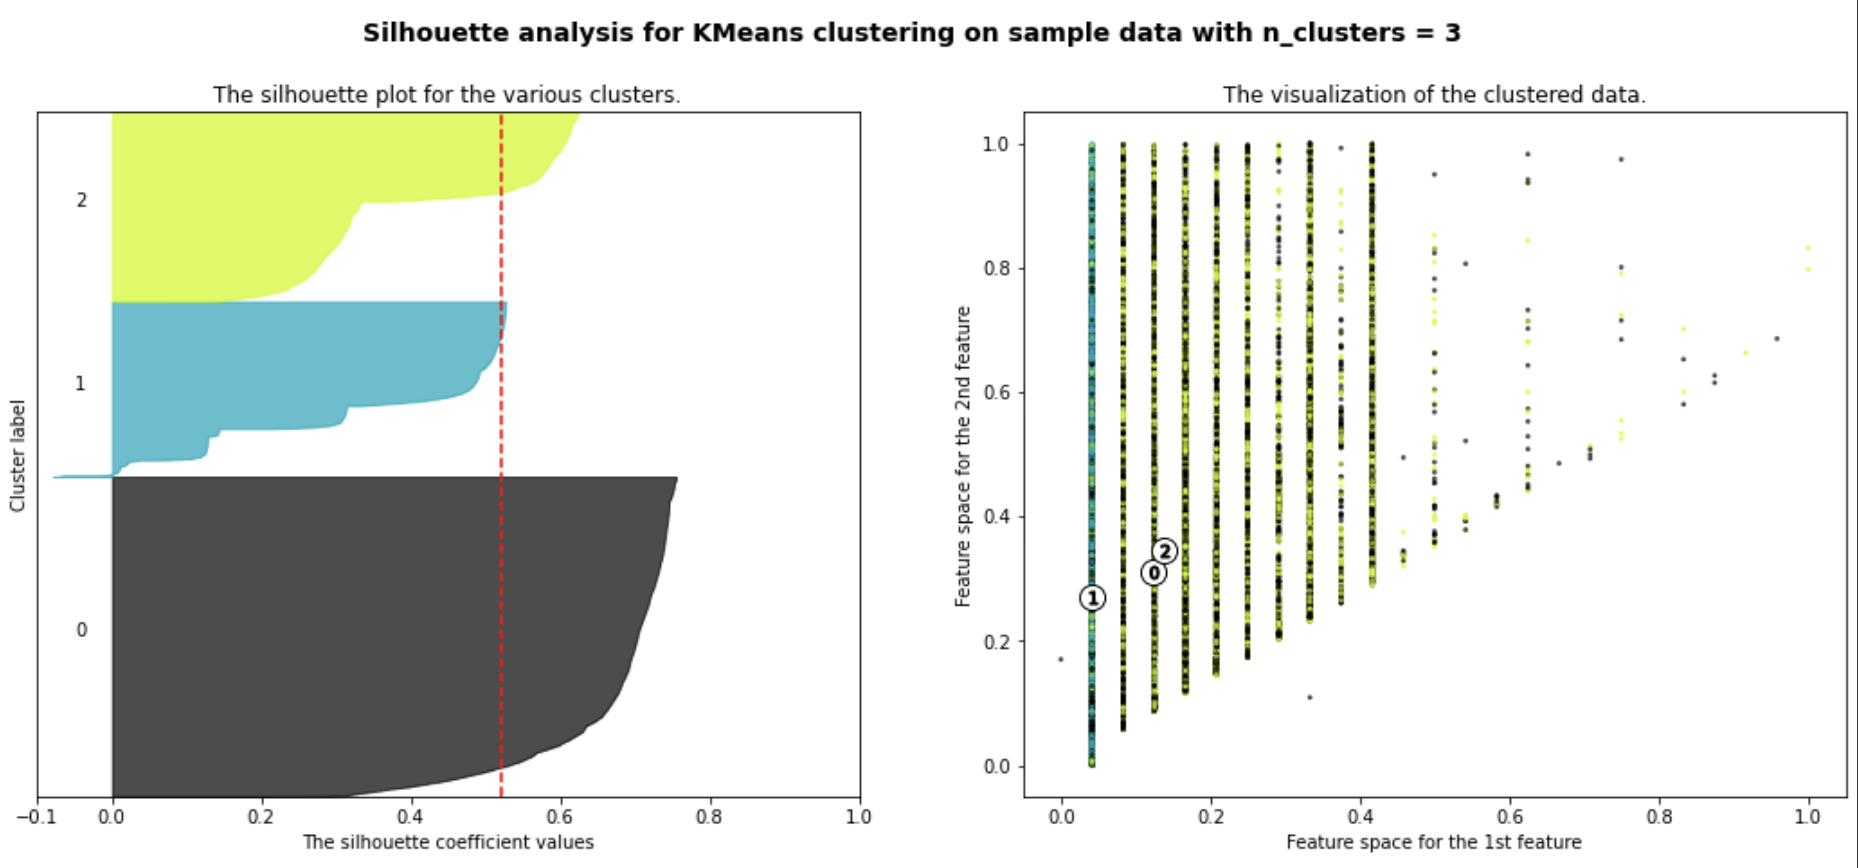

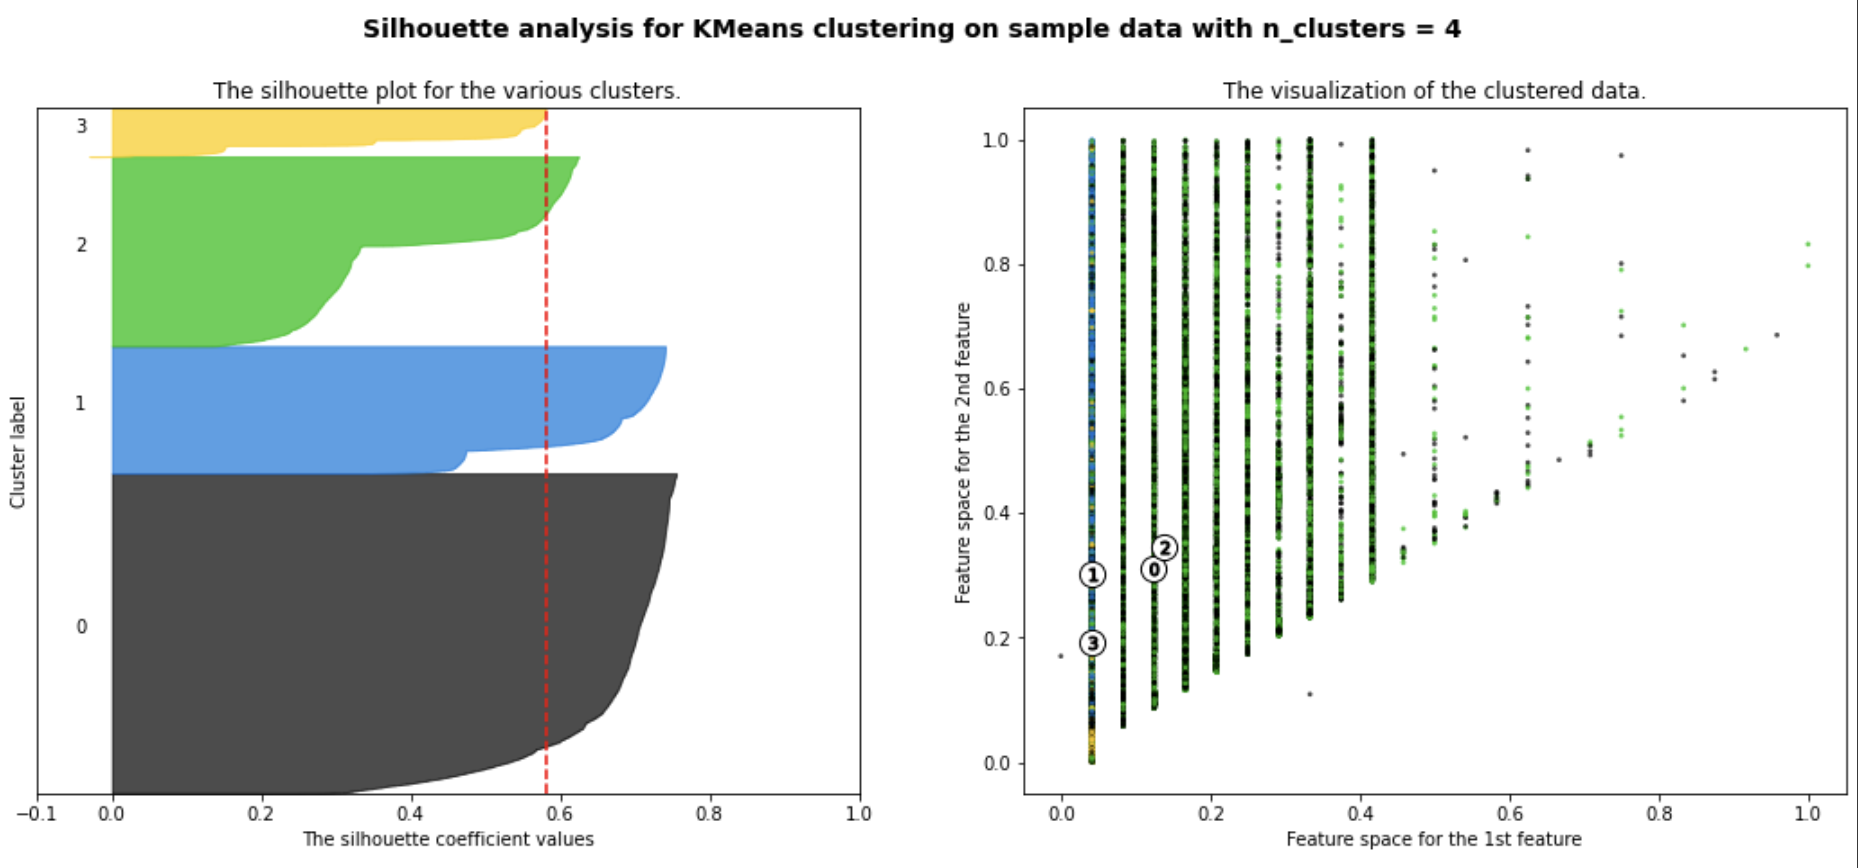

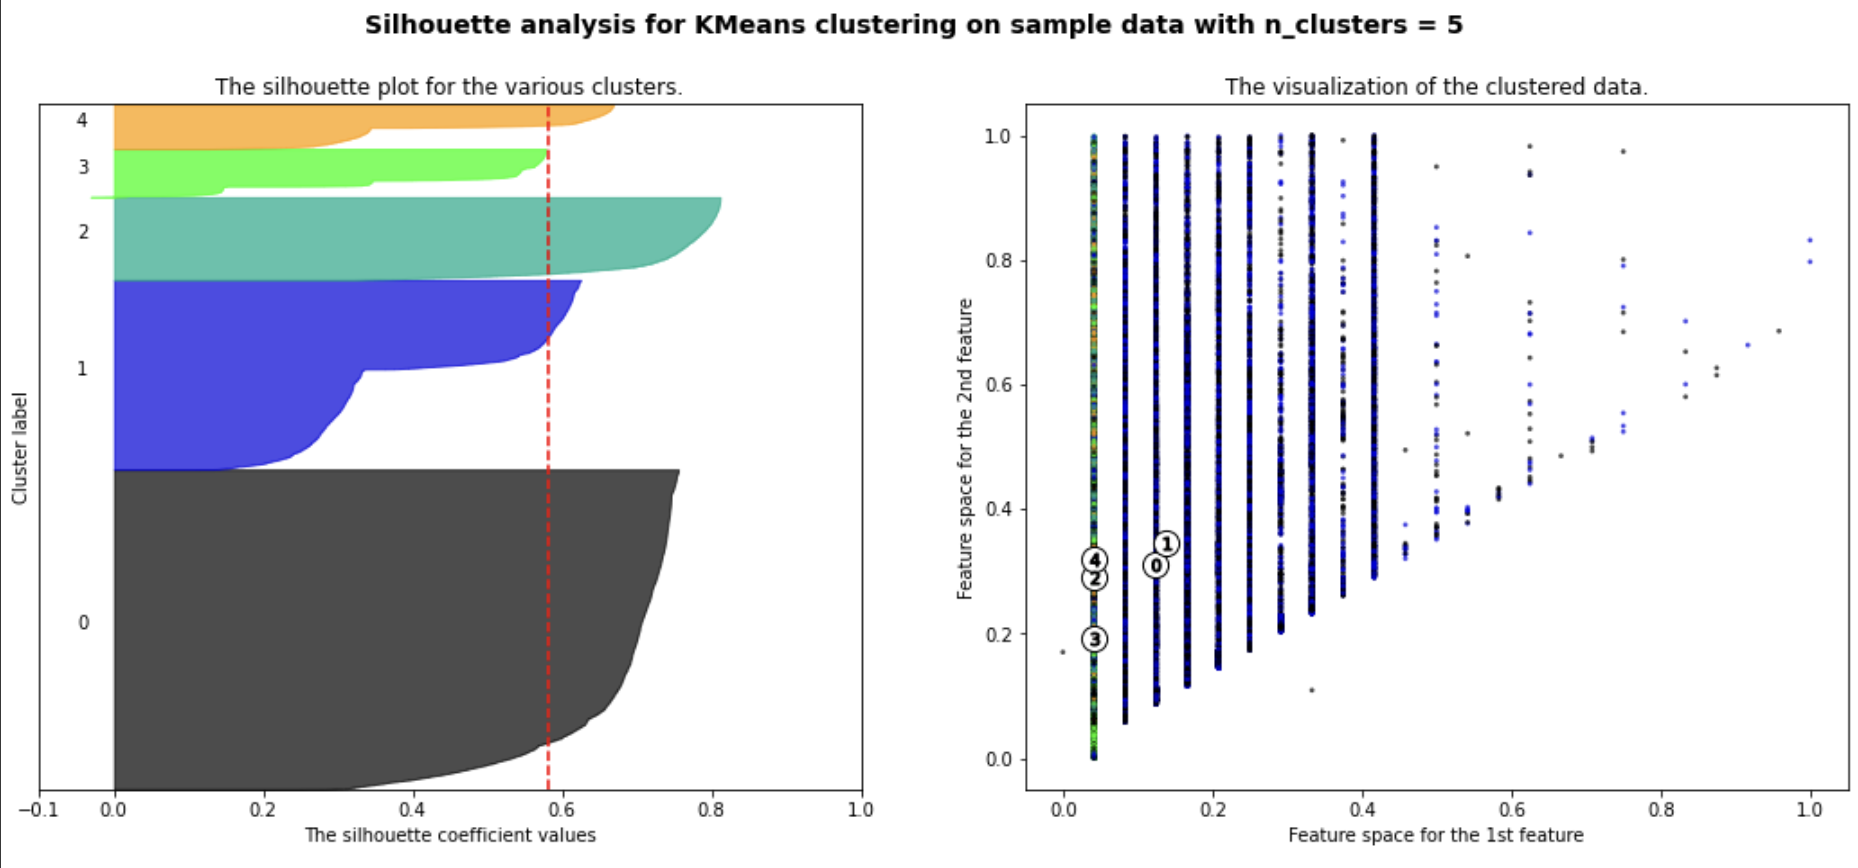

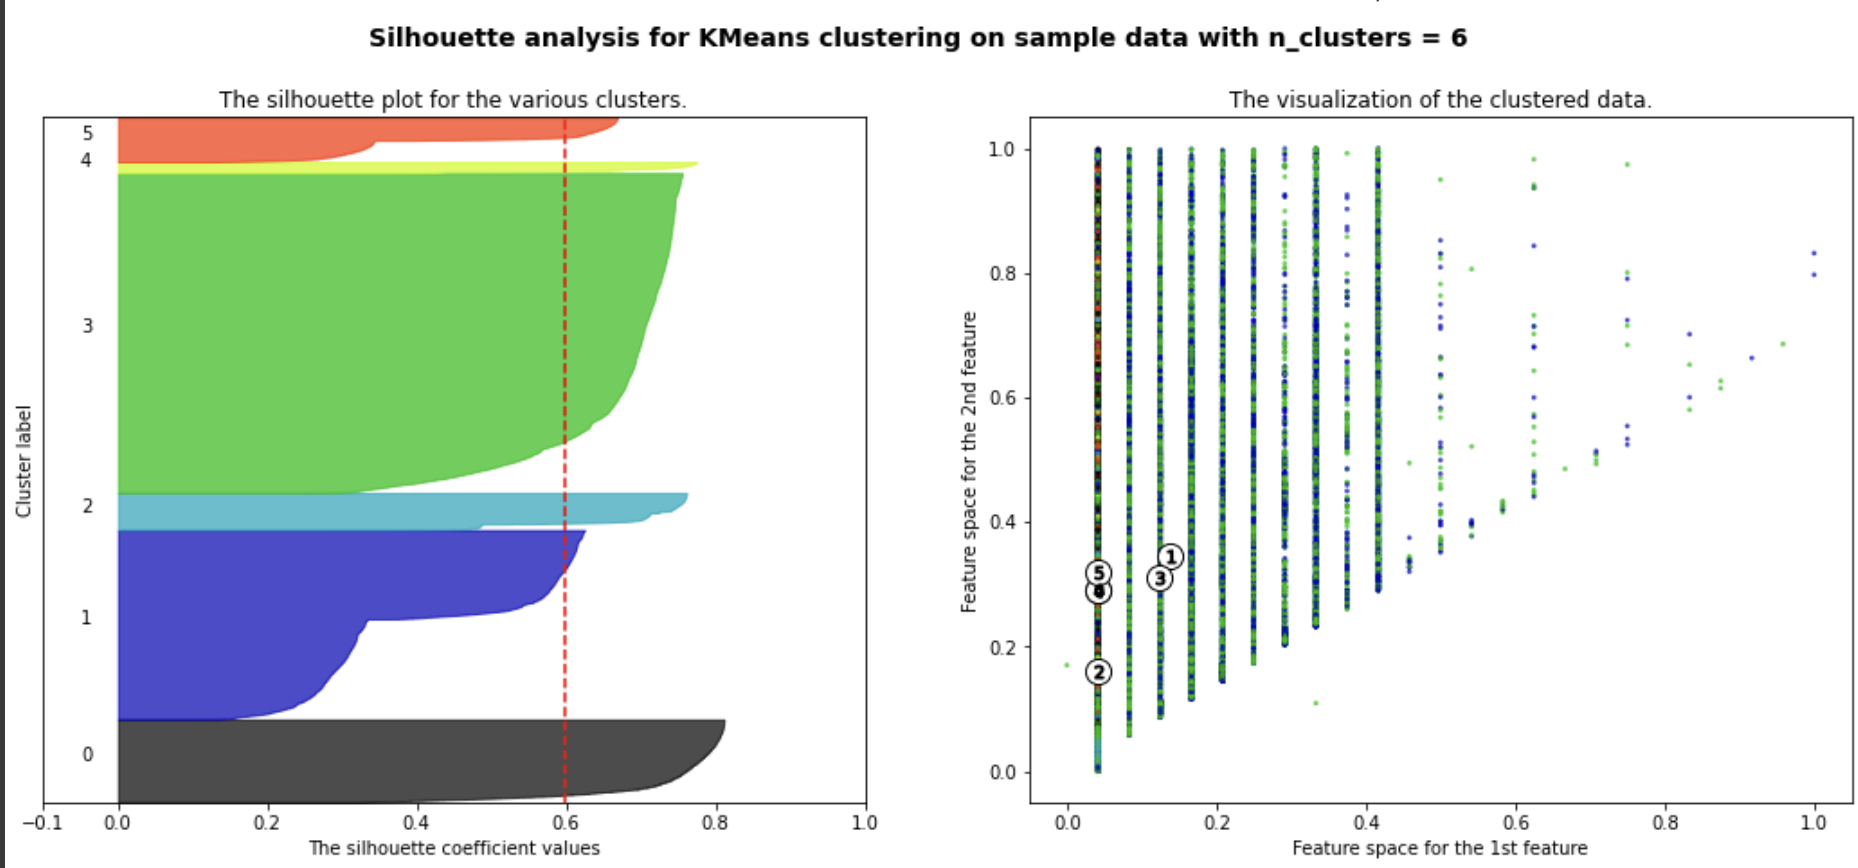

##Cluster Interpretation & Result

In [ ]:
cluster_model = cluster.KMeans(n_clusters=3)
cluster_model.fit(df_cluster)
cluster_label = cluster_model.labels_
df_segmentation['cluster'] = cluster_label
df_segmentation

,order_id,customer_state,payment_type,payment_installments,payment_value,cluster
0,e481f51cbdc54678b7cc49136f2d6af7,SP,credit_card,1,18.12,1
1,e481f51cbdc54678b7cc49136f2d6af7,SP,voucher,1,2.0,2
2,e481f51cbdc54678b7cc49136f2d6af7,SP,voucher,1,18.59,2
6,ad21c59c0840e6cb83a9ceb5573f8159,SP,credit_card,1,28.62,1
9,6514b8ad8028c9f2cc2374ded245783f,RJ,credit_card,3,75.16,0
...,...,...,...,...,...,...
95162,aa04ef5214580b06b10e2a378300db44,MG,voucher,1,250.0,2
95163,aa04ef5214580b06b10e2a378300db44,MG,credit_card,5,139.43,0
95164,880675dff2150932f1601e1c07eadeeb,SP,credit_card,3,155.99,1
95165,9c5dedf39a927c1b2549525ed64a053c,SP,credit_card,3,85.08,1


Interpreting each cluster

In [ ]:
#number of orders on each cluster
df_segmentation.groupby('cluster')['order_id'].agg(['count'])

,count
cluster,
0,17729
1,29934
2,16410


In [ ]:
#analyse customer state
df_segmentation.groupby(['cluster'])['customer_state'].describe()

,count,unique,top,freq
cluster,,,,
0,17729,2,RJ,9399
1,29934,1,SP,29934
2,16410,3,SP,10608


In [ ]:
#analyse payment types
df_segmentation.groupby(['cluster'])['payment_type'].describe()

,count,unique,top,freq
cluster,,,,
0,17729,2,credit_card,17727
1,29934,1,credit_card,29934
2,16410,3,boleto,11907


In [ ]:
#analyse payment installments
round(df_segmentation.groupby(['cluster'])['payment_installments'].agg(['mean','median','max','min']),2)

,mean,median,max,min
cluster,,,,
0,3.33,2.0,24,1
1,2.96,2.0,23,0
2,1.0,1.0,1,1


In [ ]:
#analyse payment value
round(df_segmentation.groupby(['cluster'])['payment_value'].agg(['mean','median','max','min']),2)

,mean,median,max,min
cluster,,,,
0,118.81,103.6,344.89,0.01
1,107.2,88.55,344.84,0.01
2,93.43,73.43,344.44,0.01
